In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [43]:
df = pd.read_csv('/Users/apple/Documents/dataset_37_diabetes.csv',index_col=0)
df['class'] = df['class'].map({'tested_positive':1, 'tested_negative':0})
df.head()

,plas,pres,skin,insu,mass,pedi,age,class
preg,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))
scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,plas,pres,skin,insu,mass,pedi,age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [45]:
from sklearn.model_selection import train_test_split
X = df[['age']]
Y = df[['class']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [46]:
from sklearn.model_selection import GridSearchCV
neighbors = np.arange(1,60)

grid_params = {
    'n_neighbors': neighbors,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

GS = GridSearchCV(
     KNeighborsClassifier(),
     grid_params,
     verbose = 1,
     cv = 3,
     #n_jobs = -1
     )
GS_results = GS.fit(X_train, Y_train.values.ravel())
GS_results.best_estimator_
GS_results.best_params_
GS_results.best_score_
print('Best score', GS_results.best_score_)
print('Best estimator', GS_results.best_estimator_)

Fitting 3 folds for each of 236 candidates, totalling 708 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score 0.6945996275605214
Best estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=47, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done 708 out of 708 | elapsed:    5.4s finished
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train.values.ravel())
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
    #error_rate.append(np.mean(pred_i!=Y_test))
   

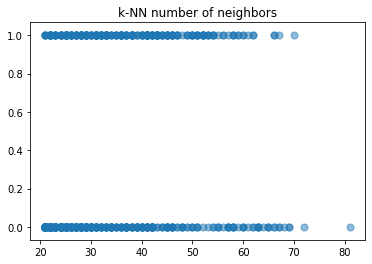

In [48]:
plt.title('k-NN number of neighbors')
plt.scatter(X, Y, s = 50, alpha = .5)

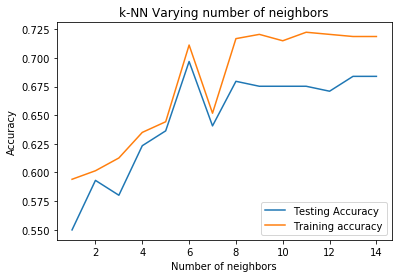

In [49]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [50]:
knn.score(X_test,Y_test)

0.683982683982684

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[131,  20],
       [ 53,  27]])

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       151
           1       0.57      0.34      0.43        80

    accuracy                           0.68       231
   macro avg       0.64      0.60      0.60       231
weighted avg       0.66      0.68      0.66       231

